In [1]:
import sys
sys.path.insert(0,'..')
from classifier_config import ClassifierConfig
from feature_extractor import FeatureExtractor
from model_trainer import ModelTrainer
from wsa_classifier import WordSenseAlignmentClassifier

In [57]:
english_config = ClassifierConfig('en_core_web_lg', "english", '../data/train', balancing_strategy="none", testset_ratio=0.2, logger = 'default')
feature_extractor = FeatureExtractor() \
    .first_word() \
    .similarity() \
    .diff_pos_count() \
    .tfidf() \
    .ont_hot_pos() \
    .matching_lemma() \
    .count_each_pos() \
    .cosine() \
    .jaccard() \
    .avg_count_synsets()\
    .difference_in_length()

model_trainer = ModelTrainer(english_config.testset_ratio, english_config.logger)

english_classifier = WordSenseAlignmentClassifier(english_config, feature_extractor, model_trainer)
data = english_classifier.load_data().get_preprocessed_data()

In [182]:
from sklearn.feature_extraction.text import TfidfVectorizer

def1_array = data['def1'].array
vectorizer = TfidfVectorizer()
def1_x = vectorizer.fit_transform(data['def1'])


**Analyse the length of definitions**

In [183]:
data['token_count_1'] = data['processed_1'].map(lambda doc: len(doc))
data['token_count_2'] = data['processed_2'].map(lambda doc: len(doc))


mean length: 6.649280575539568


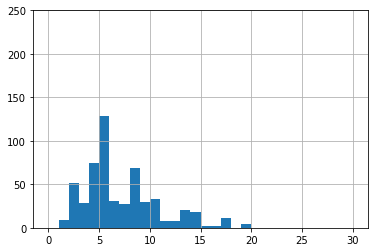

In [184]:
hist_1 = data['token_count_1'].hist(range=(0,30), bins = 30)
hist_1.set_ylim([0,250])
print('mean length: ' + str(data['token_count_1'].mean()))

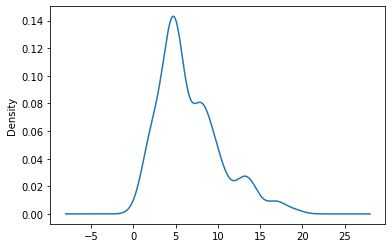

In [185]:
data['token_count_1'].plot.kde()

mean length: 6.16546762589928


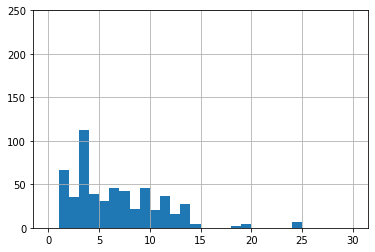

In [186]:
hist_2 = data['token_count_2'].hist(range=(0,30), bins = 30)
hist_2.set_ylim([0,250])
print('mean length: ' + str(data['token_count_2'].mean()))

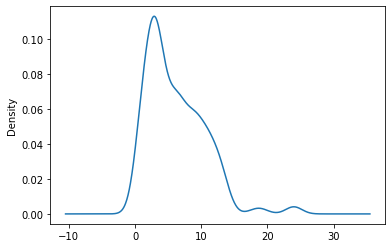

In [187]:
data['token_count_2'].plot.kde()

**Count Punctuations**

In [188]:
data['punct_count_1'] = data['processed_1'].map(lambda doc: len([token for token in  doc if token.pos_ is 'PUNCT']))
data['punct_count_2'] = data['processed_2'].map(lambda doc: len([token for token in  doc if token.pos_ is 'PUNCT']))
print('average count of punctuations'+str(data['punct_count_1'].mean()))
print('average count of punctuations'+str(data['punct_count_2'].mean()))

average count of punctuations0.6312949640287769
average count of punctuations0.8489208633093526


In [189]:
data

,word,pos,def1,def2,relation,processed_1,processed_2,lemmatized_1,stopwords_removed_1,lemmatized_2,stopwords_removed_2,token_count_2,token_count_1,punct_count_1,punct_count_2
0,off,preposition,away from and no longer touching,away from; down from,narrower,"(away, from, and, no, longer, touching)","(away, from, ;, down, from)","(away, from, and, no, longer, touching)","[away, longer, touching]","(away, from, ;, down, from)",[away],5,6,0,1
1,off,preposition,away from and no longer touching,not wanting or allowed to have (food etc),none,"(away, from, and, no, longer, touching)","(not, wanting, or, allowed, to, have, (, food,...","(away, from, and, no, longer, touching)","[away, longer, touching]","(not, want, or, allow, to, have, (, food, etc, ))","[want, allow, food, etc]",10,6,0,2
2,off,preposition,away from and no longer touching,"out of (a vehicle, train etc)",none,"(away, from, and, no, longer, touching)","(out, of, (, a, vehicle, ,, train, etc, ))","(away, from, and, no, longer, touching)","[away, longer, touching]","(out, of, (, a, vehicle, ,, train, etc, ))","[vehicle, train, etc]",9,6,0,3
3,off,preposition,in a position away from,away from; down from,narrower,"(in, a, position, away, from)","(away, from, ;, down, from)","(in, a, position, away, from)","[position, away]","(away, from, ;, down, from)",[away],5,5,0,1
4,off,preposition,in a position away from,not wanting or allowed to have (food etc),none,"(in, a, position, away, from)","(not, wanting, or, allowed, to, have, (, food,...","(in, a, position, away, from)","[position, away]","(not, want, or, allow, to, have, (, food, etc, ))","[want, allow, food, etc]",10,5,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,on,preposition,immediately following,followed by,related,"(immediately, following)","(followed, by)","(immediately, follow)","[immediately, follow]","(follow, by)",[follow],2,2,0,0
552,one,number,the number 1,the number or figure 1,exact,"(the, number, 1)","(the, number, or, figure, 1)","(the, number, 1)","[number, 1]","(the, number, or, figure, 1)","[number, figure, 1]",5,3,0,0
553,one,number,the number 1,the age of 1,related,"(the, number, 1)","(the, age, of, 1)","(the, number, 1)","[number, 1]","(the, age, of, 1)","[age, 1]",4,3,0,0
554,offspring,noun,a person's child or an animal's baby,"(formal, humorous) someone's child or children",broader,"(a, person, 's, child, or, an, animal, 's, baby)","((, formal, ,, humorous, ), someone, 's, child...","(a, person, 's, child, or, an, animal, 's, baby)","[person, child, animal, baby]","((, formal, ,, humorous, ), someone, 's, child...","[formal, humorous, child, child]",10,9,0,3


Counter({'NOUN': 672, 'VERB': 639, 'ADP': 419, 'DET': 352, 'PUNCT': 351, 'ADJ': 275, 'CCONJ': 224, 'ADV': 204, 'PART': 189, 'AUX': 120, 'PROPN': 96, 'X': 68, 'PRON': 50, 'SCONJ': 28, 'NUM': 10})
Counter({'NOUN': 585, 'ADP': 489, 'PUNCT': 472, 'VERB': 407, 'DET': 281, 'ADJ': 263, 'ADV': 182, 'CCONJ': 172, 'PART': 151, 'X': 142, 'AUX': 126, 'SCONJ': 77, 'PRON': 46, 'PROPN': 18, 'NUM': 14, 'SYM': 2, 'INTJ': 1})


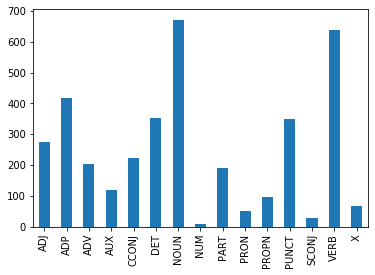

In [190]:
import pandas as pd
from collections import Counter

def count_pos_of_corpus(rows):
    pos_arr = []
    for i, doc in rows.iteritems():
        
       # print(doc.index)
        for token in doc:
            pos_arr.append(token.pos_)
    
    pos_count = Counter(pos_arr)
    print(pos_count)
    return pd.Series(pos_count)

pos_count_1 = count_pos_of_corpus(data['processed_1']).sort_index()
pos_count_2 = count_pos_of_corpus(data['processed_2']).sort_index()

pos_count_1.plot(kind='bar')

#print(count_pos_of_corpus(data['processed_2']))
#pos_df = data['processed_1'].apply(lambda col: count_pos_of_corpus(col))



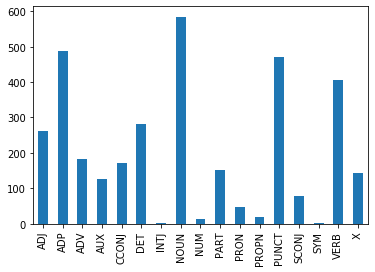

In [191]:
pos_count_2.plot(kind='bar')


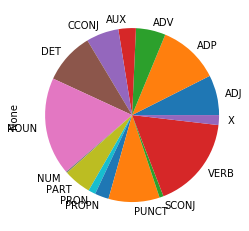

In [192]:
pos_count_1.plot(kind='pie')


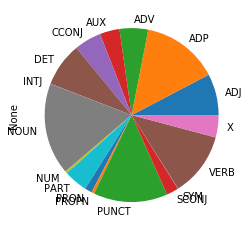

In [180]:
pos_count_2.plot(kind='pie')

**There are differences in part-of-speech usages between two dictionaries**
